In [12]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
def plot_histogram(data_list, datasource):
    fig_path = './fig/'
    plt.figure(figsize=(10, 8))
    sns.histplot(data_list, bins=20, kde=False, palette='colorblind')
    plt.xlabel('Cosine similarity', fontsize=26)
    plt.ylabel('Frequency', fontsize=26)
    if datasource == 'YOUTUBE_UGC':
        plt.title('Cosine Similarity Distribution on YouTube-UGC', fontsize=26)
    elif datasource == 'KONVID_1K':
        plt.title('Cosine Similarity Distribution on KoNViD-1k', fontsize=26)
    plt.xticks(fontsize=26)
    plt.yticks(fontsize=26)
    plt.grid(True)
    plt.tight_layout()  # Ensure labels do not overlap

    plt.savefig(f"{fig_path}{datasource}_cosine_similarity_histogram.eps", format='eps', dpi=300, bbox_inches='tight')
    plt.show()
    plt.close()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


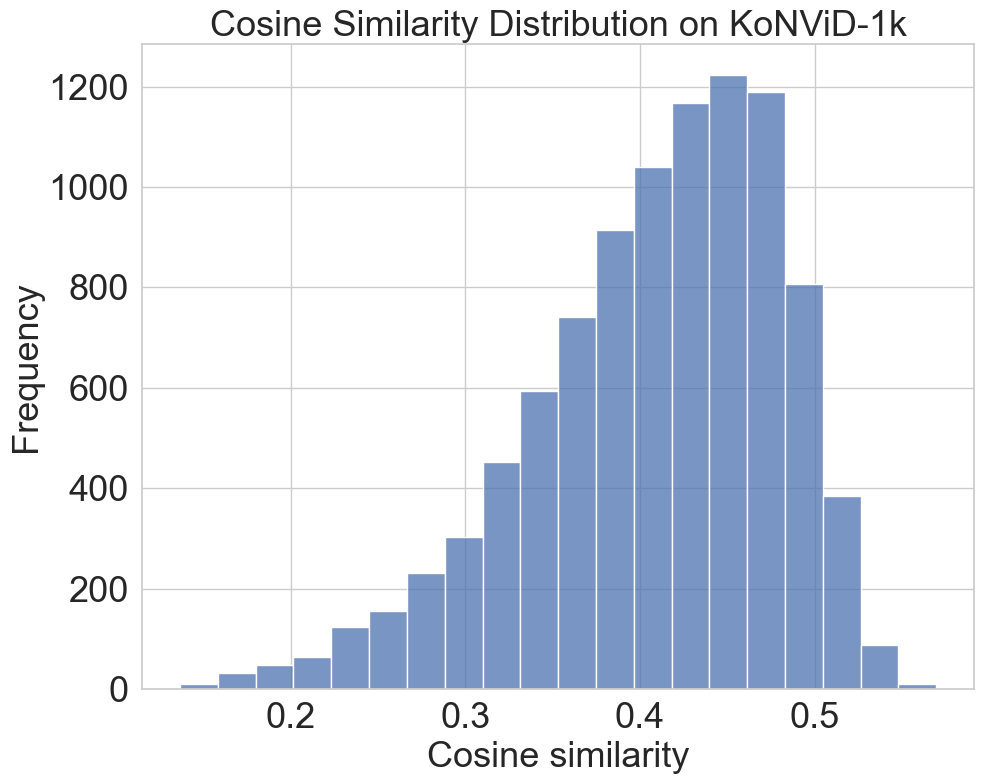

In [14]:
    datasource = 'KONVID_1K'
    folder_path = f"./cosine_similarity/{datasource}"

    # List all CSV files in the folder
    csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

    # Extract data from each CSV file and merge into a single list
    cosine_similarity_list = []
    for csv_file in csv_files:
        csv_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(csv_path)
        cosine_similarity_list.extend(df['Cosine similarity'].tolist())

    # Plot the histogram
    sns.set(style='whitegrid')  # Set a white grid background
    plot_histogram(cosine_similarity_list, datasource)